Imports. We need matplotlib/numpy to show images inline in iPython.

In [5]:
import os
from PIL import Image, ImageFilter
from matplotlib.pyplot import imshow
import numpy as np

%matplotlib inline

Constants and configuration

In [36]:
# Source and destination directories.
source_dir = 'images/'
dest_dir   = 'images.normalized/'

# We're normalizing the images to be square.
normalized_size = 128

Walking filesystem trees

In [32]:
root_dir = source_dir
for subdir, dirs, files in os.walk(root_dir):
    for file in files:
        print os.path.join(subdir, file)

images/statler/download (2).jpeg
images/statler/images.jpeg
images/statler/download (11).jpeg
images/statler/images (2).jpeg
images/statler/download (1).jpeg
images/statler/images (1).jpeg
images/statler/download.jpeg
images/bert/Bert_sunscreen.jpg
images/bert/BertReindeer.png
images/bert/Bert_party_hat.png
images/bert/download (2).jpeg
images/bert/download (8).jpeg
images/bert/download (18).jpeg
images/bert/images.jpeg
images/bert/download (12).jpeg
images/bert/download (7).jpeg
images/bert/download (5).jpeg
images/bert/download (6).jpeg
images/bert/download (11).jpeg
images/bert/BertCrossingFingers.jpg
images/bert/Bert_smile.png
images/bert/download (3).jpeg
images/bert/download (9).jpeg
images/bert/321337-bert.jpg
images/bert/download (4).jpeg
images/bert/download (1).jpeg
images/bert/download (10).jpeg
images/bert/images (1).jpeg
images/bert/download.jpeg
images/bert/Bert_frown.png
images/kermit_the_frog/images (6).jpeg
images/kermit_the_frog/download (16).jpeg
images/kermit_the_fr

Function to normalize an image

In [55]:
def normalize_image(source_file, dest_file, size):
    # Read image
    input_image = Image.open(source_file)

    # Resize the image so that its longest edge is no longer than 'size' pixels.
    input_image.thumbnail([size, size])
    
    # Create a new square image to put the thumbnail in.
    normalized_image = Image.new("RGB", [size, size])
    
    x = (size - input_image.width)  / 2
    y = (size - input_image.height) / 2
    normalized_image.paste(input_image, box=(x, y))
    
    # Save the normalized image
    normalized_image.save(dest_file, 'PNG')

Now walk the tree and perform the normalization.

In [56]:
for subdir, dirs, files in os.walk(source_dir):
    for file in files:
        # Generate the name for the normalized file: 
        # - In the destination directory.
        # - Change extension to .png.
        input_file = os.path.join(subdir, file)
        dest_file  = input_file.replace(source_dir, dest_dir, 1)
        dest_file  = os.path.splitext(dest_file)[0] + ".png"
        
        # Create the directory it's supposed to be in.
        if not os.path.exists(os.path.dirname(dest_file)):
            os.makedirs(os.path.dirname(dest_file))
        
        # Now perform the normalization
        normalize_image(input_file, dest_file, normalized_size)

Let's see what one of these looks like...

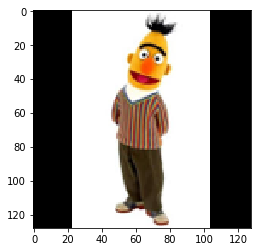

In [57]:
image = Image.open("images.normalized/bert/download (7).png")
imshow(np.asarray(image))